In [7]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 630 µs (started: 2023-06-07 03:52:49 +00:00)


## convert daily mean 360-day calendar stuff to Gregorian

## jonnyhtw/360day2greg is licensed under the GNU General Public License v3.0

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import iris
import xarray as xr
import cartopy.crs as ccrs
import cf_units as unit
import warnings
warnings.filterwarnings('ignore')
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import cartopy
import calendar
import iris.plot as iplt
import matplotlib.transforms as transforms
import random
import matplotlib.patches as patches
import iris.quickplot as qplt
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import copy
from tqdm import tqdm
import datetime

time: 3.8 ms (started: 2023-06-07 03:52:49 +00:00)


## use method from http://loca.ucsd.edu/loca-calendar/ 

## the following cell has variables for use in the 'papermill' python packge

In [9]:
year = 1972
var = 'air_temperature'


time: 458 µs (started: 2023-06-07 03:52:49 +00:00)


In [10]:
if var == 'air_temperature':
    units = r'[K]'


time: 14.2 ms (started: 2023-06-07 03:52:49 +00:00)


In [11]:
fontsize = 20

latmin = -50
latmax = -30
lonmin = 165
lonmax = 180


time: 14.4 ms (started: 2023-06-07 03:52:49 +00:00)


In [12]:
pwd

'/scale_wlg_persistent/filesets/project/niwa00013/williamsjh/360day2greg'

time: 7.94 ms (started: 2023-06-07 03:52:49 +00:00)


In [13]:
#go to the 360day2greg directory...
path  = './'

if not os.path.exists(path+'gregorian'):
    print('creating gregorian folder')
    os.makedirs(path+'gregorian')
    
if not os.path.exists(path+'gregorian/pdfs'):
    print('creating pdfs folder')
    os.makedirs(path+'gregorian/pdfs')
    
    

time: 8.86 ms (started: 2023-06-07 03:52:49 +00:00)


In [14]:
cube = iris.load_cube(path+'tasmin_day_UKESM1-0-LL_histSST-1950HC'+
      '_r1i1p1f2_gn_19500101-20141230.nc', 
      var &
      iris.Constraint(time=lambda cell: cell.point.year == year)).\
intersection(latitude = (latmin,latmax),
             longitude = (lonmin,lonmax))

time: 10.3 s (started: 2023-06-07 03:52:49 +00:00)


In [15]:
cube

<iris 'Cube' of air_temperature / (K) (time: 360; latitude: 18; longitude: 10)>

time: 102 ms (started: 2023-06-07 03:52:59 +00:00)


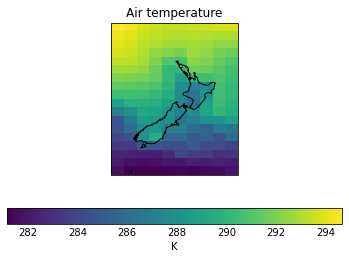

time: 2.43 s (started: 2023-06-07 03:52:59 +00:00)


In [16]:
ax = plt.subplot(1,1,1,projection = ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
qplt.pcolormesh(cube[0])
plt.show();

In [17]:
split_cube = {}

for i in tqdm(range(360)):
    split_cube[str(i)] = copy.deepcopy(cube[i])

100%|███████████████████████████████████████████████████████████████████████████| 360/360 [00:01<00:00, 236.71it/s]

time: 1.55 s (started: 2023-06-07 03:53:02 +00:00)


In [18]:
split_cube.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

time: 4.81 ms (started: 2023-06-07 03:53:03 +00:00)


In [19]:
len(split_cube)


360

time: 2.94 ms (started: 2023-06-07 03:53:03 +00:00)


In [20]:
random.seed(year)

rands = []

for i in range(5):

    myrand = random.randrange(0 + i * 72, 72 + i * 72)
    
    if myrand == 359:
        myrand -= 1 
    
    rands.append(myrand)

print(rands)

[27, 109, 158, 218, 328]
time: 948 µs (started: 2023-06-07 03:53:03 +00:00)


In [21]:
u = unit.Unit('days since 0001-01-01 00:00:00', calendar='proleptic_gregorian')

time: 671 µs (started: 2023-06-07 03:53:03 +00:00)


In [22]:
counter = 0

for month in range(12):

    for day in range(30):
        
        print(counter)
        
        #following 2 lines from https://stackoverflow.com/a/53373130/6288682
        tcoord = split_cube[str(counter)].coord('time')
        tcoord.units = unit.Unit('days since 0001-01-01 00:00:00', calendar='proleptic_gregorian')

        split_cube[str(counter)].coord('time')

        split_cube[str(counter)].coord('time').points =  u.date2num(datetime.datetime(year, 1, 1)) + counter
        split_cube[str(counter)].coord('time')
        
        counter += 1

0


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-01 00:00:00]+bounds>

1


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-02 00:00:00]+bounds>

2


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-03 00:00:00]+bounds>

3


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-04 00:00:00]+bounds>

4


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-05 00:00:00]+bounds>

5


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-06 00:00:00]+bounds>

6


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-07 00:00:00]+bounds>

7


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-08 00:00:00]+bounds>

8


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-09 00:00:00]+bounds>

9


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-10 00:00:00]+bounds>

10


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-11 00:00:00]+bounds>

11


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-12 00:00:00]+bounds>

12


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-13 00:00:00]+bounds>

13


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-14 00:00:00]+bounds>

14


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-15 00:00:00]+bounds>

15


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-16 00:00:00]+bounds>

16


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-17 00:00:00]+bounds>

17


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-18 00:00:00]+bounds>

18


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-19 00:00:00]+bounds>

19


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-20 00:00:00]+bounds>

20


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-21 00:00:00]+bounds>

21


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-22 00:00:00]+bounds>

22


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-23 00:00:00]+bounds>

23


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-24 00:00:00]+bounds>

24


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-25 00:00:00]+bounds>

25


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-26 00:00:00]+bounds>

26


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-27 00:00:00]+bounds>

27


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-28 00:00:00]+bounds>

28


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-04-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-29 00:00:00]+bounds>

29


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-30 00:00:00]+bounds>

30


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-31 00:00:00]+bounds>

31


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-01 00:00:00]+bounds>

32


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-02 00:00:00]+bounds>

33


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-03 00:00:00]+bounds>

34


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-04 00:00:00]+bounds>

35


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-05 00:00:00]+bounds>

36


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-06 00:00:00]+bounds>

37


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-07 00:00:00]+bounds>

38


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-08 00:00:00]+bounds>

39


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-09 00:00:00]+bounds>

40


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-10 00:00:00]+bounds>

41


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-11 00:00:00]+bounds>

42


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-12 00:00:00]+bounds>

43


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-13 00:00:00]+bounds>

44


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-14 00:00:00]+bounds>

45


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-15 00:00:00]+bounds>

46


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-16 00:00:00]+bounds>

47


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-17 00:00:00]+bounds>

48


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-18 00:00:00]+bounds>

49


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-19 00:00:00]+bounds>

50


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-20 00:00:00]+bounds>

51


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-21 00:00:00]+bounds>

52


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-22 00:00:00]+bounds>

53


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-23 00:00:00]+bounds>

54


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-24 00:00:00]+bounds>

55


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-25 00:00:00]+bounds>

56


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-26 00:00:00]+bounds>

57


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-27 00:00:00]+bounds>

58


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-28 00:00:00]+bounds>

59


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-05-31 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-02-29 00:00:00]+bounds>

60


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-01 00:00:00]+bounds>

61


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-02 00:00:00]+bounds>

62


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-03 00:00:00]+bounds>

63


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-04 00:00:00]+bounds>

64


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-05 00:00:00]+bounds>

65


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-06 00:00:00]+bounds>

66


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-07 00:00:00]+bounds>

67


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-08 00:00:00]+bounds>

68


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-09 00:00:00]+bounds>

69


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-10 00:00:00]+bounds>

70


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-11 00:00:00]+bounds>

71


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-12 00:00:00]+bounds>

72


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-13 00:00:00]+bounds>

73


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-14 00:00:00]+bounds>

74


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-15 00:00:00]+bounds>

75


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-16 00:00:00]+bounds>

76


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-17 00:00:00]+bounds>

77


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-18 00:00:00]+bounds>

78


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-19 00:00:00]+bounds>

79


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-20 00:00:00]+bounds>

80


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-21 00:00:00]+bounds>

81


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-22 00:00:00]+bounds>

82


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-23 00:00:00]+bounds>

83


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-24 00:00:00]+bounds>

84


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-25 00:00:00]+bounds>

85


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-26 00:00:00]+bounds>

86


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-27 00:00:00]+bounds>

87


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-28 00:00:00]+bounds>

88


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-29 00:00:00]+bounds>

89


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-06-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-30 00:00:00]+bounds>

90


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-03-31 00:00:00]+bounds>

91


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-01 00:00:00]+bounds>

92


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-02 00:00:00]+bounds>

93


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-03 00:00:00]+bounds>

94


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-04 00:00:00]+bounds>

95


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-05 00:00:00]+bounds>

96


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-06 00:00:00]+bounds>

97


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-07 00:00:00]+bounds>

98


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-08 00:00:00]+bounds>

99


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-09 00:00:00]+bounds>

100


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-10 00:00:00]+bounds>

101


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-11 00:00:00]+bounds>

102


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-12 00:00:00]+bounds>

103


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-13 00:00:00]+bounds>

104


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-14 00:00:00]+bounds>

105


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-15 00:00:00]+bounds>

106


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-16 00:00:00]+bounds>

107


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-17 00:00:00]+bounds>

108


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-18 00:00:00]+bounds>

109


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-19 00:00:00]+bounds>

110


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-20 00:00:00]+bounds>

111


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-21 00:00:00]+bounds>

112


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-22 00:00:00]+bounds>

113


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-23 00:00:00]+bounds>

114


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-24 00:00:00]+bounds>

115


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-25 00:00:00]+bounds>

116


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-26 00:00:00]+bounds>

117


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-27 00:00:00]+bounds>

118


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-28 00:00:00]+bounds>

119


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-29 00:00:00]+bounds>

120


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-07-31 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-04-30 00:00:00]+bounds>

121


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-01 00:00:00]+bounds>

122


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-02 00:00:00]+bounds>

123


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-03 00:00:00]+bounds>

124


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-04 00:00:00]+bounds>

125


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-05 00:00:00]+bounds>

126


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-06 00:00:00]+bounds>

127


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-07 00:00:00]+bounds>

128


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-08 00:00:00]+bounds>

129


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-09 00:00:00]+bounds>

130


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-10 00:00:00]+bounds>

131


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-11 00:00:00]+bounds>

132


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-12 00:00:00]+bounds>

133


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-13 00:00:00]+bounds>

134


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-14 00:00:00]+bounds>

135


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-15 00:00:00]+bounds>

136


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-16 00:00:00]+bounds>

137


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-17 00:00:00]+bounds>

138


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-18 00:00:00]+bounds>

139


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-19 00:00:00]+bounds>

140


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-20 00:00:00]+bounds>

141


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-21 00:00:00]+bounds>

142


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-22 00:00:00]+bounds>

143


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-23 00:00:00]+bounds>

144


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-24 00:00:00]+bounds>

145


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-25 00:00:00]+bounds>

146


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-26 00:00:00]+bounds>

147


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-27 00:00:00]+bounds>

148


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-28 00:00:00]+bounds>

149


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-29 00:00:00]+bounds>

150


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-30 00:00:00]+bounds>

151


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-08-31 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-05-31 00:00:00]+bounds>

152


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-01 00:00:00]+bounds>

153


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-02 00:00:00]+bounds>

154


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-03 00:00:00]+bounds>

155


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-04 00:00:00]+bounds>

156


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-05 00:00:00]+bounds>

157


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-06 00:00:00]+bounds>

158


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-07 00:00:00]+bounds>

159


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-08 00:00:00]+bounds>

160


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-09 00:00:00]+bounds>

161


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-10 00:00:00]+bounds>

162


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-11 00:00:00]+bounds>

163


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-12 00:00:00]+bounds>

164


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-13 00:00:00]+bounds>

165


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-14 00:00:00]+bounds>

166


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-15 00:00:00]+bounds>

167


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-16 00:00:00]+bounds>

168


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-17 00:00:00]+bounds>

169


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-18 00:00:00]+bounds>

170


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-19 00:00:00]+bounds>

171


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-20 00:00:00]+bounds>

172


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-21 00:00:00]+bounds>

173


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-22 00:00:00]+bounds>

174


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-23 00:00:00]+bounds>

175


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-24 00:00:00]+bounds>

176


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-25 00:00:00]+bounds>

177


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-26 00:00:00]+bounds>

178


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-27 00:00:00]+bounds>

179


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-28 00:00:00]+bounds>

180


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-29 00:00:00]+bounds>

181


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-09-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-06-30 00:00:00]+bounds>

182


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-01 00:00:00]+bounds>

183


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-02 00:00:00]+bounds>

184


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-03 00:00:00]+bounds>

185


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-04 00:00:00]+bounds>

186


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-05 00:00:00]+bounds>

187


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-06 00:00:00]+bounds>

188


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-07 00:00:00]+bounds>

189


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-08 00:00:00]+bounds>

190


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-09 00:00:00]+bounds>

191


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-10 00:00:00]+bounds>

192


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-11 00:00:00]+bounds>

193


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-12 00:00:00]+bounds>

194


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-13 00:00:00]+bounds>

195


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-14 00:00:00]+bounds>

196


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-15 00:00:00]+bounds>

197


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-16 00:00:00]+bounds>

198


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-17 00:00:00]+bounds>

199


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-18 00:00:00]+bounds>

200


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-19 00:00:00]+bounds>

201


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-20 00:00:00]+bounds>

202


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-21 00:00:00]+bounds>

203


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-22 00:00:00]+bounds>

204


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-23 00:00:00]+bounds>

205


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-24 00:00:00]+bounds>

206


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-25 00:00:00]+bounds>

207


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-26 00:00:00]+bounds>

208


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-27 00:00:00]+bounds>

209


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-28 00:00:00]+bounds>

210


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-29 00:00:00]+bounds>

211


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-30 00:00:00]+bounds>

212


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-10-31 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-07-31 00:00:00]+bounds>

213


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-01 00:00:00]+bounds>

214


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-02 00:00:00]+bounds>

215


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-03 00:00:00]+bounds>

216


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-04 00:00:00]+bounds>

217


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-05 00:00:00]+bounds>

218


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-06 00:00:00]+bounds>

219


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-07 00:00:00]+bounds>

220


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-08 00:00:00]+bounds>

221


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-09 00:00:00]+bounds>

222


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-10 00:00:00]+bounds>

223


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-11 00:00:00]+bounds>

224


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-12 00:00:00]+bounds>

225


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-13 00:00:00]+bounds>

226


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-14 00:00:00]+bounds>

227


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-15 00:00:00]+bounds>

228


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-16 00:00:00]+bounds>

229


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-17 00:00:00]+bounds>

230


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-18 00:00:00]+bounds>

231


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-19 00:00:00]+bounds>

232


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-20 00:00:00]+bounds>

233


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-21 00:00:00]+bounds>

234


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-22 00:00:00]+bounds>

235


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-23 00:00:00]+bounds>

236


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-24 00:00:00]+bounds>

237


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-25 00:00:00]+bounds>

238


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-26 00:00:00]+bounds>

239


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-27 00:00:00]+bounds>

240


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-28 00:00:00]+bounds>

241


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-29 00:00:00]+bounds>

242


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-11-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-30 00:00:00]+bounds>

243


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-08-31 00:00:00]+bounds>

244


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-01 00:00:00]+bounds>

245


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-02 00:00:00]+bounds>

246


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-03 00:00:00]+bounds>

247


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-04 00:00:00]+bounds>

248


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-05 00:00:00]+bounds>

249


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-06 00:00:00]+bounds>

250


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-07 00:00:00]+bounds>

251


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-08 00:00:00]+bounds>

252


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-09 00:00:00]+bounds>

253


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-10 00:00:00]+bounds>

254


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-11 00:00:00]+bounds>

255


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-12 00:00:00]+bounds>

256


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-13 00:00:00]+bounds>

257


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-14 00:00:00]+bounds>

258


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-15 00:00:00]+bounds>

259


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-16 00:00:00]+bounds>

260


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-17 00:00:00]+bounds>

261


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-18 00:00:00]+bounds>

262


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-19 00:00:00]+bounds>

263


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-20 00:00:00]+bounds>

264


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-21 00:00:00]+bounds>

265


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-22 00:00:00]+bounds>

266


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-23 00:00:00]+bounds>

267


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-24 00:00:00]+bounds>

268


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-25 00:00:00]+bounds>

269


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-26 00:00:00]+bounds>

270


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-27 00:00:00]+bounds>

271


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-28 00:00:00]+bounds>

272


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-29 00:00:00]+bounds>

273


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0121-12-31 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-09-30 00:00:00]+bounds>

274


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-01 00:00:00]+bounds>

275


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-02 00:00:00]+bounds>

276


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-03 00:00:00]+bounds>

277


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-04 00:00:00]+bounds>

278


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-05 00:00:00]+bounds>

279


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-06 00:00:00]+bounds>

280


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-07 00:00:00]+bounds>

281


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-08 00:00:00]+bounds>

282


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-09 00:00:00]+bounds>

283


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-10 00:00:00]+bounds>

284


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-11 00:00:00]+bounds>

285


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-12 00:00:00]+bounds>

286


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-13 00:00:00]+bounds>

287


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-14 00:00:00]+bounds>

288


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-15 00:00:00]+bounds>

289


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-16 00:00:00]+bounds>

290


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-17 00:00:00]+bounds>

291


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-18 00:00:00]+bounds>

292


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-19 00:00:00]+bounds>

293


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-20 00:00:00]+bounds>

294


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-21 00:00:00]+bounds>

295


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-22 00:00:00]+bounds>

296


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-23 00:00:00]+bounds>

297


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-24 00:00:00]+bounds>

298


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-25 00:00:00]+bounds>

299


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-26 00:00:00]+bounds>

300


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-27 00:00:00]+bounds>

301


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-28 00:00:00]+bounds>

302


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-29 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-29 00:00:00]+bounds>

303


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-30 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-30 00:00:00]+bounds>

304


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-01-31 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-10-31 00:00:00]+bounds>

305


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-01 00:00:00]+bounds>

306


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-02 00:00:00]+bounds>

307


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-03 00:00:00]+bounds>

308


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-04 00:00:00]+bounds>

309


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-05 00:00:00]+bounds>

310


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-06 00:00:00]+bounds>

311


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-07 00:00:00]+bounds>

312


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-08 00:00:00]+bounds>

313


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-09 00:00:00]+bounds>

314


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-10 00:00:00]+bounds>

315


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-11 00:00:00]+bounds>

316


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-12 00:00:00]+bounds>

317


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-13 00:00:00]+bounds>

318


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-14 00:00:00]+bounds>

319


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-15 00:00:00]+bounds>

320


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-16 00:00:00]+bounds>

321


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-17 00:00:00]+bounds>

322


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-18 00:00:00]+bounds>

323


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-19 00:00:00]+bounds>

324


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-20 00:00:00]+bounds>

325


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-21 00:00:00]+bounds>

326


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-22 00:00:00]+bounds>

327


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-23 00:00:00]+bounds>

328


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-24 00:00:00]+bounds>

329


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-25 00:00:00]+bounds>

330


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-26 00:00:00]+bounds>

331


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-27 00:00:00]+bounds>

332


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-02-28 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-28 00:00:00]+bounds>

333


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-01 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-29 00:00:00]+bounds>

334


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-02 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-11-30 00:00:00]+bounds>

335


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-03 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-01 00:00:00]+bounds>

336


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-04 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-02 00:00:00]+bounds>

337


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-05 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-03 00:00:00]+bounds>

338


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-06 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-04 00:00:00]+bounds>

339


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-07 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-05 00:00:00]+bounds>

340


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-08 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-06 00:00:00]+bounds>

341


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-09 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-07 00:00:00]+bounds>

342


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-10 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-08 00:00:00]+bounds>

343


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-11 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-09 00:00:00]+bounds>

344


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-12 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-10 00:00:00]+bounds>

345


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-13 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-11 00:00:00]+bounds>

346


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-14 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-12 00:00:00]+bounds>

347


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-15 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-13 00:00:00]+bounds>

348


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-16 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-14 00:00:00]+bounds>

349


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-17 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-15 00:00:00]+bounds>

350


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-18 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-16 00:00:00]+bounds>

351


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-19 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-17 00:00:00]+bounds>

352


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-20 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-18 00:00:00]+bounds>

353


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-21 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-19 00:00:00]+bounds>

354


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-22 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-20 00:00:00]+bounds>

355


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-23 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-21 00:00:00]+bounds>

356


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-24 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-22 00:00:00]+bounds>

357


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-25 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-23 00:00:00]+bounds>

358


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-26 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-24 00:00:00]+bounds>

359


<DimCoord: time / (days since 0001-01-01 00:00:00)  [0122-03-27 12:00:00]+bounds>

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-12-25 00:00:00]+bounds>

time: 1.71 s (started: 2023-06-07 03:53:03 +00:00)


In [23]:
rands

[27, 109, 158, 218, 328]

time: 1.77 ms (started: 2023-06-07 03:53:05 +00:00)


In [24]:
split_cube_shifted = {}

for j in tqdm(range(5)):

    for i in range(72*j,72*(j+1)):

        if i < rands[j]:

            split_cube_shifted[str(i+j).zfill(3)] = copy.deepcopy(split_cube[str(i)])

        if i == rands[j]:

            pass

        if i >= rands[j]:

            split_cube_shifted[str(i+j+1).zfill(3)] = copy.deepcopy(split_cube[str(i)])


    split_cube_shifted[str(rands[j]+j).zfill(3)] = ( copy.deepcopy(split_cube[str(rands[j])]) +
                                          copy.deepcopy(split_cube[str(rands[j]+1)]) )/2.

100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.30it/s]

time: 691 ms (started: 2023-06-07 03:53:05 +00:00)


In [25]:
len(split_cube)
len(split_cube_shifted)


360

365

time: 5.63 ms (started: 2023-06-07 03:53:06 +00:00)


In [26]:
rands

[27, 109, 158, 218, 328]

time: 6.7 ms (started: 2023-06-07 03:53:06 +00:00)


In [27]:
split_cube_shifted.keys()


dict_keys(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '027', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '1

time: 3.56 ms (started: 2023-06-07 03:53:06 +00:00)


In [28]:
split_cube_shifted_ordered = {}

time: 556 µs (started: 2023-06-07 03:53:06 +00:00)


In [29]:
for i in tqdm(range(365)):
    split_cube_shifted_ordered[str(i).zfill(3)] = split_cube_shifted[str(i).zfill(3)]

100%|████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 169781.63it/s]

time: 11.8 ms (started: 2023-06-07 03:53:06 +00:00)


In [30]:
split_cube_shifted_ordered.keys()

dict_keys(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '1

time: 3.96 ms (started: 2023-06-07 03:53:06 +00:00)


In [31]:
time = list(split_cube.values())[0].coord('time')
dates = time.units.num2date(time.points)
print(dates)

[cftime.DatetimeProlepticGregorian(1972, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
time: 2.97 ms (started: 2023-06-07 03:53:06 +00:00)


100%|████████████████████████████████████████████████████████████████████████████| 365/365 [05:39<00:00,  1.08it/s]


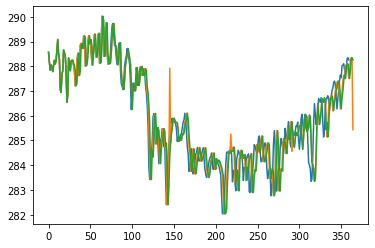

time: 16min 58s (started: 2023-06-07 03:53:06 +00:00)


In [32]:
series = []

for i in tqdm(range(360)):
    series.append(list(split_cube.values())[i].collapsed(('latitude','longitude'),iris.analysis.MEAN).data)
    
plt.plot( series,'-')

#

series_shifted = []


for i in tqdm(range(365)):
    series_shifted.append(list(split_cube_shifted.values())[i].\
                  collapsed(('latitude','longitude'),iris.analysis.MEAN).data)
   
plt.plot( series_shifted,'-')

#

series_shifted_ordered = []

for i in tqdm(range(365)):
    series_shifted_ordered.append(list(split_cube_shifted_ordered.values())[i].\
                  collapsed(('latitude','longitude'),iris.analysis.MEAN).data)
      
plt.plot( series_shifted_ordered,'-')

plt.show();

In [33]:
series == series_shifted
series_shifted == series_shifted_ordered

False

False

time: 4.86 ms (started: 2023-06-07 04:10:04 +00:00)


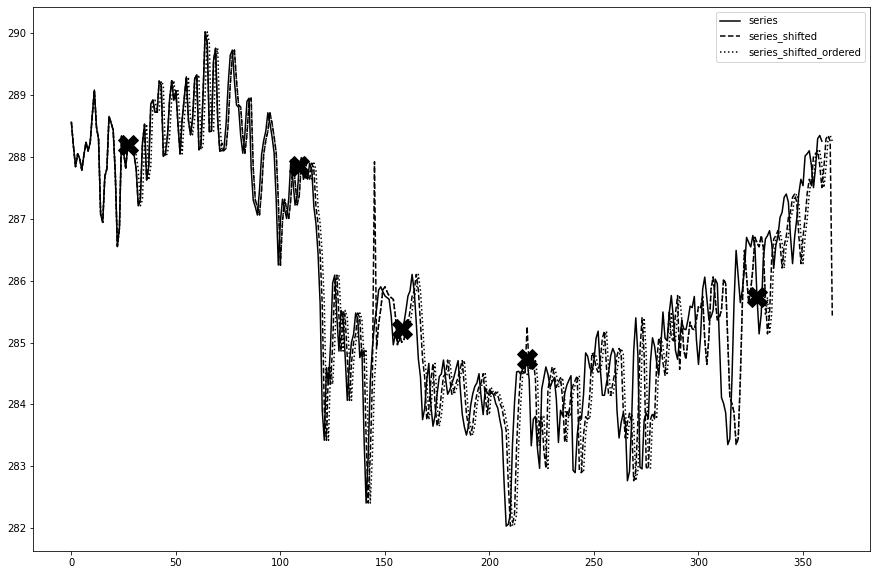

time: 5.58 s (started: 2023-06-07 04:10:04 +00:00)


In [34]:
fig = plt.figure(figsize=[15,10])

plt.plot(series,'k-',label = 'series')
plt.plot(series_shifted,'k--',label = 'series_shifted')
plt.plot(series_shifted_ordered,'k:', label = 'series_shifted_ordered')

for i in range(5):

    plt.plot(rands[i], 
         list(split_cube.values())[rands[i]].collapsed(('latitude','longitude'),iris.analysis.MEAN).data,
        'Xk',alpha=1, markersize = 20,)
    
plt.legend()

plt.show();

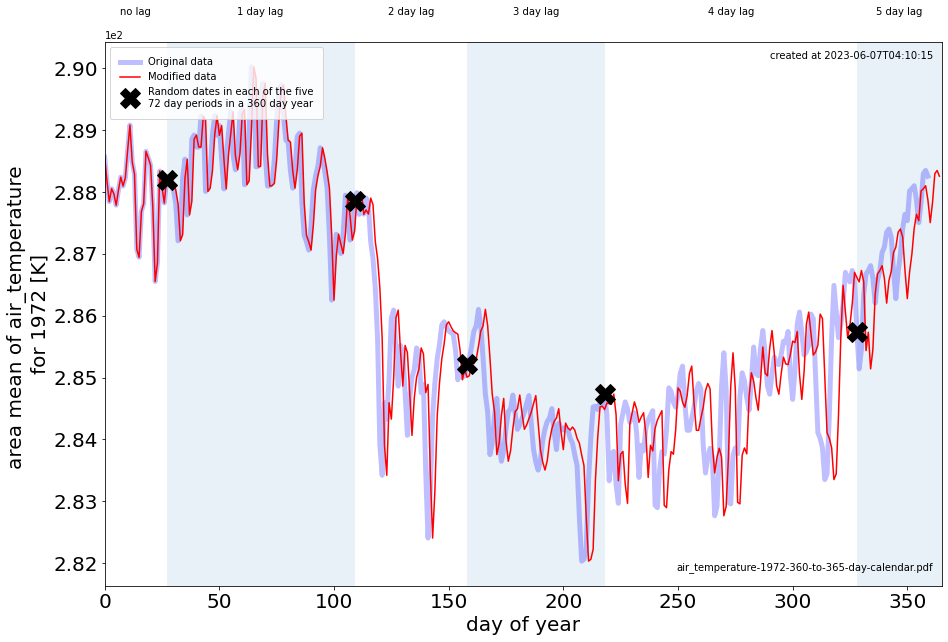

time: 7.01 s (started: 2023-06-07 04:10:10 +00:00)


In [35]:
fig = plt.figure(figsize=[15,10])

ax = plt.subplot(1,1,1)

plt.plot(series,'b-',label = 'Original data', alpha = 0.25, linewidth = 5)
plt.plot(series_shifted_ordered,'r-', label = 'Modified data')

lims = ax.get_ylim()

for i in range(5):

    if i == 0:
    
        label = 'Random dates in each of the five\n72 day periods in a 360 day year'
    
    else:
        label = '_nolegend_'
    plt.plot(rands[i], 
         list(split_cube.values())[rands[i]].collapsed(('latitude','longitude'),iris.analysis.MEAN).data,
        'Xk',alpha=1, markersize = 20,label = label)
    
plt.legend(borderpad = 1, loc = 'upper left')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)    
    
midpoints = (np.array(rands[1:]) + np.array(rands[:-1])) / 2
ax.text(rands[0]/2,1.05,'no lag',ha = 'center', fontsize = fontsize*0.5,transform=trans)


for j in range(4):
    ax.text(midpoints[j],1.05,str(j+1)+' day lag',ha = 'center',transform = trans)
ax.text(rands[-1]+(365-rands[-1])/2,1.05,str(len(rands))+' day lag',ha = 'center', fontsize = fontsize*0.5, 
       transform=trans)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.xlabel('day of year', fontsize = fontsize)
plt.ylabel('area mean of '+var+' \nfor '+str(year)+' '+units,fontsize = fontsize)


rect = Rectangle((rands[0],lims[0]),rands[1]-rands[0],lims[1]-lims[0], alpha = 0.1)
ax.add_patch(rect)

rect = Rectangle((rands[2],lims[0]),rands[3]-rands[2],lims[1]-lims[0], alpha = 0.1)
ax.add_patch(rect)

rect = Rectangle((rands[4],lims[0]),365-rands[4],lims[1]-lims[0], alpha = 0.1)
ax.add_patch(rect)

plt.xlim([0,365])

plt.text(0.99,0.97,'created at '+str(datetime.datetime.now().replace(microsecond=0).isoformat()),
         transform = ax.transAxes,ha = 'right')

filenamestring = path+'/gregorian/pdfs/'+var+\
          '-'+str(year)+\
          '-360-to-365-day-calendar.pdf'

plt.text(0.99,0.03, os.path.basename(filenamestring), transform = ax.transAxes, ha = 'right')

plt.savefig(filenamestring)

plt.show();



In [36]:
split_cube_shifted_ordered[str(rands[0]).zfill(3)].add_aux_coord(iris.coords.AuxCoord(0, long_name='time'))
split_cube_shifted_ordered[str(rands[1]+1).zfill(3)].add_aux_coord(iris.coords.AuxCoord(0, long_name='time'))
split_cube_shifted_ordered[str(rands[2]+2).zfill(3)].add_aux_coord(iris.coords.AuxCoord(0, long_name='time'))
split_cube_shifted_ordered[str(rands[3]+3).zfill(3)].add_aux_coord(iris.coords.AuxCoord(0, long_name='time'))
split_cube_shifted_ordered[str(rands[4]+4).zfill(3)].add_aux_coord(iris.coords.AuxCoord(0, long_name='time'))


time: 1.98 ms (started: 2023-06-07 04:10:17 +00:00)


In [37]:
for i in tqdm(range(len(split_cube_shifted_ordered))):
    
    tcoord = split_cube_shifted_ordered[str(i).zfill(3)].coord('time')
    tcoord.units = unit.Unit('days since 0001-01-01 00:00:00', calendar='proleptic_gregorian')

    split_cube_shifted_ordered[str(i).zfill(3)].coord('time').points  = \
    u.date2num(datetime.datetime(year, 1, 1)) + i
    
    split_cube_shifted_ordered[str(i).zfill(3)].coord('time').bounds = None
    


100%|██████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 7924.51it/s]

time: 52.4 ms (started: 2023-06-07 04:10:17 +00:00)


In [38]:
split_cube_shifted_ordered['000'].coord('time')

<DimCoord: time / (days since 0001-01-01 00:00:00)  [1972-01-01 00:00:00]>

time: 3.05 ms (started: 2023-06-07 04:10:17 +00:00)


In [39]:
print(list(split_cube_shifted_ordered.values())[0].coord('time'))
print('--')
print(list(split_cube_shifted_ordered.values())[-1].coord('time'))


DimCoord :  time / (days since 0001-01-01 00:00:00, proleptic_gregorian calendar)
    points: [1972-01-01 00:00:00]
    shape: (1,)
    dtype: int64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'
--
DimCoord :  time / (days since 0001-01-01 00:00:00, proleptic_gregorian calendar)
    points: [1972-12-30 00:00:00]
    shape: (1,)
    dtype: int64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'
time: 9.86 ms (started: 2023-06-07 04:10:17 +00:00)


In [40]:
for i in range(58,60):

    u.num2date(split_cube_shifted_ordered[str(i).zfill(3)].coord('time').points)[0].month
    u.num2date(split_cube_shifted_ordered[str(i).zfill(3)].coord('time').points)[0].day
    print('--')
    

2

28

--


2

29

--
time: 20.2 ms (started: 2023-06-07 04:10:17 +00:00)


In [41]:
year

1972

time: 1.9 ms (started: 2023-06-07 04:10:17 +00:00)


In [42]:
if calendar.isleap(year) == False:

    cube_for_saving = copy.deepcopy(split_cube_shifted_ordered)

    for i in tqdm(range(len(cube_for_saving))):

        cube_for_saving[str(i).zfill(3)] = iris.util.new_axis(cube_for_saving[str(i).zfill(3)],'time')

        file_for_saving = path+'/gregorian/'+\
                  var+\
          '-'+str(u.num2date(cube_for_saving[str(i).zfill(3)].coord('time').points)[0].year)+\
          '-'+str(u.num2date(cube_for_saving[str(i).zfill(3)].coord('time').points)[0].month).zfill(2)+\
          '-'+str(u.num2date(cube_for_saving[str(i).zfill(3)].coord('time').points)[0].day).zfill(2)+\
          '-gregorian.nc'

        print(file_for_saving)    
            
        iris.save(cube_for_saving[str(i).zfill(3)],file_for_saving)
    


time: 3.66 ms (started: 2023-06-07 04:10:17 +00:00)


## leap years...

In [43]:
if calendar.isleap(year):
    print('this is a leap year so need to insert february 29th')
else:
    print('this isn\'t a leap year so nothing more to do')



this is a leap year so need to insert february 29th
time: 4.95 ms (started: 2023-06-07 04:10:17 +00:00)


In [44]:
if calendar.isleap(year) == True:

    split_cube_shifted_ordered_leap = {}

    for i in tqdm(range(365)):

        if i <= 58:

            split_cube_shifted_ordered_leap[str(i).zfill(3)] = \
                copy.deepcopy(split_cube_shifted_ordered[str(i).zfill(3)])

        else:

            split_cube_shifted_ordered_leap[str(i+1).zfill(3)] = \
            copy.deepcopy(split_cube_shifted_ordered[str(i).zfill(3)])



100%|███████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 553.98it/s]

time: 664 ms (started: 2023-06-07 04:10:17 +00:00)


In [45]:
if calendar.isleap(year) == True:
    print(split_cube_shifted_ordered_leap.keys())

dict_keys(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '1

In [46]:
if calendar.isleap(year) == True:

    split_cube_shifted_ordered_leap['059'] = ( copy.deepcopy(split_cube_shifted_ordered_leap['058']) +
                                          copy.deepcopy(split_cube_shifted_ordered_leap['060']) )/2.

time: 24.5 ms (started: 2023-06-07 04:10:18 +00:00)


In [47]:
if calendar.isleap(year) == True:

    split_cube_shifted_ordered_leap.keys()

dict_keys(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '1

time: 11.5 ms (started: 2023-06-07 04:10:18 +00:00)


In [48]:
if calendar.isleap(year) == True:

    split_cube_shifted_ordered_leap_ordered = {}

time: 2.14 ms (started: 2023-06-07 04:10:18 +00:00)


In [49]:
if calendar.isleap(year) == True:

    for i in tqdm(range(366)):
        split_cube_shifted_ordered_leap_ordered[str(i).zfill(3)] = \
            split_cube_shifted_ordered_leap[str(i).zfill(3)] 

100%|████████████████████████████████████████████████████████████████████████| 366/366 [00:00<00:00, 274667.25it/s]

time: 11.5 ms (started: 2023-06-07 04:10:18 +00:00)


In [50]:
if calendar.isleap(year) == True:

    print(split_cube_shifted_ordered_leap_ordered.keys())

dict_keys(['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '1

In [51]:
if calendar.isleap(year) == True:

    split_cube_shifted_ordered_leap_ordered[str(59).zfill(3)].\
        add_aux_coord(iris.coords.AuxCoord(0, long_name='time'))


time: 4.59 ms (started: 2023-06-07 04:10:18 +00:00)


In [52]:
if calendar.isleap(year) == True:

    for i in tqdm(range(len(split_cube_shifted_ordered_leap_ordered))):

        tcoord = split_cube_shifted_ordered_leap_ordered[str(i).zfill(3)].coord('time')
        tcoord.units = unit.Unit('days since 0001-01-01 00:00:00', calendar='proleptic_gregorian')

        split_cube_shifted_ordered_leap_ordered[str(i).zfill(3)].coord('time').points  = \
        u.date2num(datetime.datetime(year, 1, 1)) + i

        split_cube_shifted_ordered_leap_ordered[str(i).zfill(3)].coord('time').bounds = None

100%|██████████████████████████████████████████████████████████████████████████| 366/366 [00:00<00:00, 6672.09it/s]

time: 62.5 ms (started: 2023-06-07 04:10:18 +00:00)


In [53]:
if calendar.isleap(year) == True:

    print(list(split_cube_shifted_ordered_leap_ordered.values())[0].coord('time'))
    print('--')
    print(list(split_cube_shifted_ordered_leap_ordered.values())[-1].coord('time'))


DimCoord :  time / (days since 0001-01-01 00:00:00, proleptic_gregorian calendar)
    points: [1972-01-01 00:00:00]
    shape: (1,)
    dtype: int64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'
--
DimCoord :  time / (days since 0001-01-01 00:00:00, proleptic_gregorian calendar)
    points: [1972-12-31 00:00:00]
    shape: (1,)
    dtype: int64
    standard_name: 'time'
    long_name: 'time'
    var_name: 'time'
time: 3.12 ms (started: 2023-06-07 04:10:18 +00:00)


In [54]:
if calendar.isleap(year) == True:

    for i in range(58,61):

        u.num2date(split_cube_shifted_ordered_leap_ordered[str(i).zfill(3)].coord('time').points)[0].month
        u.num2date(split_cube_shifted_ordered_leap_ordered[str(i).zfill(3)].coord('time').points)[0].day
        print('--')


2

28

--


2

29

--


3

1

--
time: 26 ms (started: 2023-06-07 04:10:18 +00:00)


100%|████████████████████████████████████████████████████████████████████████████| 366/366 [05:52<00:00,  1.04it/s]


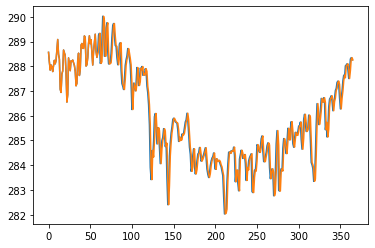

time: 11min 33s (started: 2023-06-07 04:10:18 +00:00)


In [55]:
if calendar.isleap(year) == True:

    series_shifted_ordered = []

    for i in tqdm(range(365)):
        series_shifted_ordered.append(list(split_cube_shifted_ordered.values())[i].\
                      collapsed(('latitude','longitude'),iris.analysis.MEAN).data)

    plt.plot(series_shifted_ordered)

    #

    series_shifted_ordered_leap_ordered = []

    for i in tqdm(range(366)):
        series_shifted_ordered_leap_ordered.append(list(split_cube_shifted_ordered_leap_ordered.values())[i].\
                      collapsed(('latitude','longitude'),iris.analysis.MEAN).data)

    plt.plot(series_shifted_ordered_leap_ordered)

plt.show();


In [56]:
if calendar.isleap(year) == True:

    len(series_shifted_ordered)
    len(series_shifted_ordered_leap_ordered)


365

366

time: 16.8 ms (started: 2023-06-07 04:21:52 +00:00)


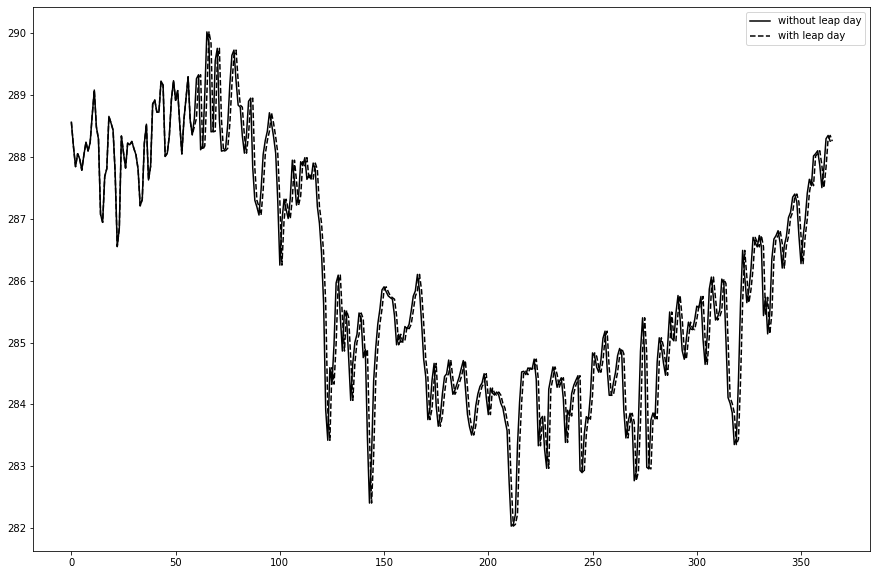

time: 163 ms (started: 2023-06-07 04:21:52 +00:00)


In [57]:
if calendar.isleap(year) == True:

    fig = plt.figure(figsize=[15,10])

    plt.plot(series_shifted_ordered,'k-',label = 'without leap day')
    plt.plot(series_shifted_ordered_leap_ordered,'k--',label = 'with leap day')

    plt.legend()

plt.show();

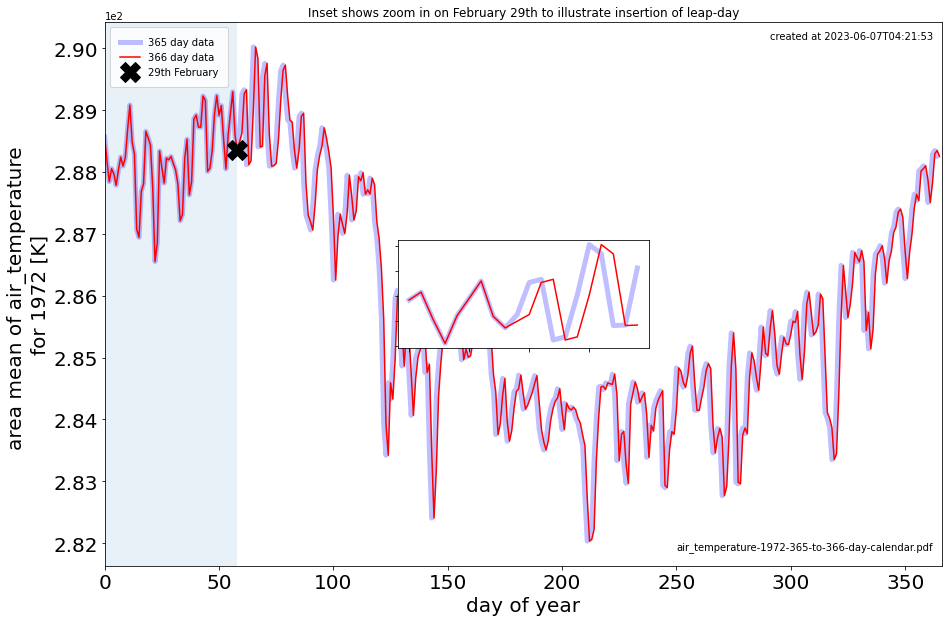

time: 1.29 s (started: 2023-06-07 04:21:52 +00:00)


In [58]:
if calendar.isleap(year) == True:

    fig = plt.figure(figsize=[15,10])

    ax = plt.subplot(1,1,1)

    plt.plot(series_shifted_ordered,'b-',label = '365 day data', alpha = 0.25, linewidth = 5)
    plt.plot(series_shifted_ordered_leap_ordered,'r-', label = '366 day data')

    label = '29th February'
    plt.plot(58, 
             list(split_cube_shifted_ordered.values())[58].collapsed(('latitude','longitude'),
                                                                     iris.analysis.MEAN).data,
            'Xk',alpha=1, markersize = 20,label = label)

    plt.legend(borderpad = 1, loc = 'upper left')



#     plt.grid()

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    
    plt.xlabel('day of year', fontsize = fontsize)
    plt.ylabel('area mean of '+var+' \nfor '+str(year)+' '+units,fontsize = fontsize)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    # inset axes....
    axins = ax.inset_axes([0.35, 0.4, 0.3, 0.2])
    axins.plot(np.arange(50,70),series_shifted_ordered[50:70],'b-',label = 'Original data', alpha = 0.25, linewidth = 5)
    axins.plot(np.arange(50,70),series_shifted_ordered_leap_ordered[50:70],'r-', label = 'Modified data')
    
    axins.set_xticklabels([])
    axins.set_yticklabels([])

    rect = Rectangle((0,lims[0]),58,lims[1]-lims[0], alpha = 0.1)
    ax.add_patch(rect)

    plt.text(0.99,0.97,'created at '+str(datetime.datetime.now().replace(microsecond=0).isoformat()),
         transform = ax.transAxes,ha = 'right')
   

    plt.xlim([0,366])


    plt.title('Inset shows zoom in on February 29th to illustrate insertion of leap-day')
    
    filenamestring = path+'/gregorian/pdfs/'+var+\
              '-'+str(year)+\
              '-365-to-366-day-calendar.pdf'


    plt.text(0.99,0.03, os.path.basename(filenamestring), transform = ax.transAxes, ha = 'right')

    plt.savefig(filenamestring)


plt.show();

In [59]:
np.arange(0,6,2)

array([0, 2, 4])

time: 2.88 ms (started: 2023-06-07 04:21:53 +00:00)


In [60]:
if calendar.isleap(year) == True:

    cube_for_saving = copy.deepcopy(split_cube_shifted_ordered_leap_ordered)

    for i in tqdm(range(len(cube_for_saving))):

        cube_for_saving[str(i).zfill(3)] = iris.util.new_axis(cube_for_saving[str(i).zfill(3)],'time')

        file_for_saving = path+'/gregorian/'+\
                  var+\
          '-'+str(u.num2date(cube_for_saving[str(i).zfill(3)].coord('time').points)[0].year)+\
          '-'+str(u.num2date(cube_for_saving[str(i).zfill(3)].coord('time').points)[0].month).zfill(2)+\
          '-'+str(u.num2date(cube_for_saving[str(i).zfill(3)].coord('time').points)[0].day).zfill(2)+\
          '-gregorian.nc'
        
        iris.save(cube_for_saving[str(i).zfill(3)],file_for_saving      )



100%|████████████████████████████████████████████████████████████████████████████| 366/366 [05:53<00:00,  1.04it/s]

time: 5min 53s (started: 2023-06-07 04:21:53 +00:00)


## now use cdo mergetime to create single files

In [61]:
#cheese

time: 459 µs (started: 2023-06-07 04:41:39 +00:00)
